In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

print(iris.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


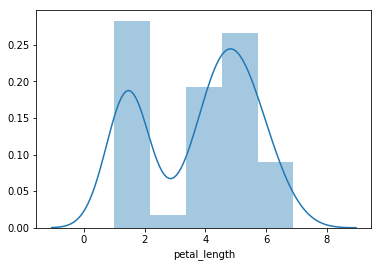

In [3]:
# What does the distribution of petal lengths look like?
sns.distplot(iris.petal_length)

In [4]:
# Is there a correlation between petal length and petal width?
iris[['petal_length', 'petal_width']].corr()

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000


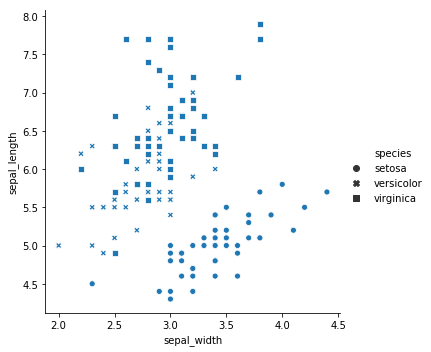

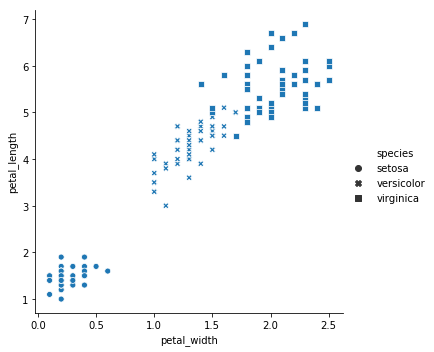

In [45]:
# Would it be reasonable to predict species based on sepal width and sepal length?
print(iris[['sepal_length', 'sepal_width']].corr())
sns.relplot(x='sepal_width', y='sepal_length', data=iris, style="species")
sns.relplot(x='petal_width', y='petal_length', data=iris, style="species")

In [46]:
# Which features would be best used to predict species?
print('petal_width and petal_length')

petal_width and petal_length


dataset     object
x          float64
y          float64
dtype: object


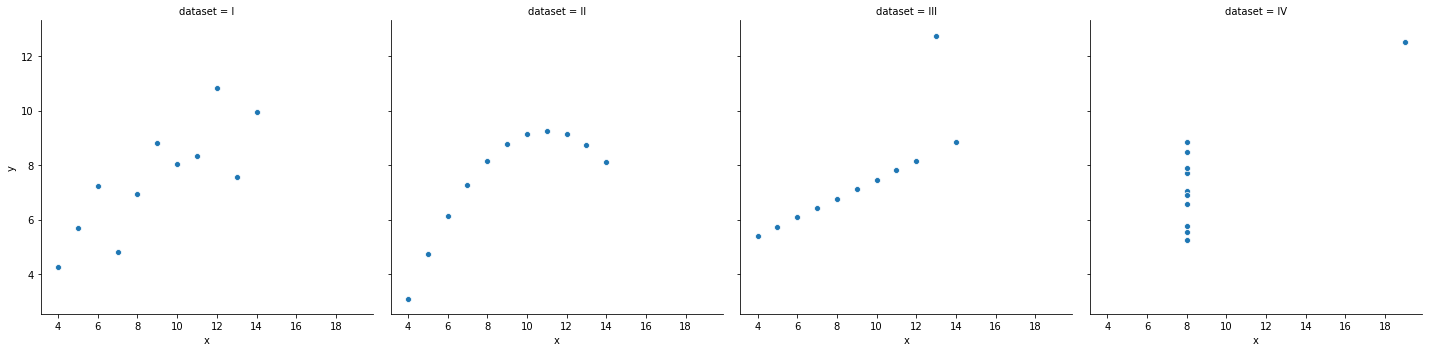

In [47]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?
anscombe = sns.load_dataset('anscombe')
print(anscombe.dtypes)

# - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x='x', y='y', data=anscombe, col="dataset")

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

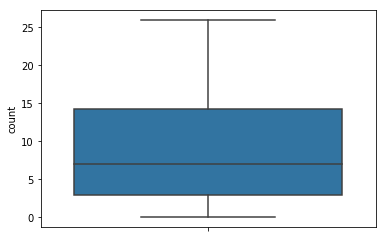

In [48]:
# 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the
# effectiveness of the different insect sprays.
from pydataset import data

insect_sprays = data('InsectSprays') # load the dataset and store it in a variable
data('InsectSprays', show_doc=True) # view the documentation for the dataset

sns.boxplot(data=insect_sprays, y='count')

In [49]:
# 3. Load the swiss dataset and read it's documentation. Create visualizations to
# answer the following questions:

swiss = data('swiss') # load the dataset and store it in a variable
data('swiss', show_doc=True) # view the documentation for the dataset

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [50]:
# - Create a column named is_catholic that holds a boolean value of whether or not the province is
# 	Catholic. (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss['Catholic'] > 70.0
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


In [51]:
# - Does whether or not a province is Catholic influence fertility?
swiss[['Catholic', 'Fertility']].corr()

,Catholic,Fertility
Catholic,1.000000,0.463685
Fertility,0.463685,1.000000


In [52]:
# - What measure correlates most strongly with fertility?
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.605023
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.475120
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.641897
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.328808
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.957798
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.207544
is_catholic,0.605023,0.475120,-0.641897,-0.328808,0.957798,0.207544,1.000000


In [58]:
# 4. Using the chipotle dataset from the previous exercise, create a barplot that shows the 4
# most popular items and the revenue produced by each.

def get_db_url(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'
    return create_engine(url)

from env import user, host, password
conn = get_db_url('chipotle', user, host, password)

url = get_db_url(env.username, env.hostname, env.password, db='chipotle')
connection = create_engine(url)




NameError: name 'env' is not defined

In [ ]:
# 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line plot of all the
# individual subject's reaction times and a more prominant line showing the average change in reaction time.
